In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [2]:
subjects=pd.read_csv("subjects.csv")

In [3]:
subjects.shape[0]

1215745

In [4]:
subjects=subjects[subjects['Label (0 for the null class)']!=0]
subjects.drop(columns=['Unnamed: 0', 'index'],inplace=True)

In [4]:
subjects['arm still']=0
subjects['arm swinging']=0
subjects['arm medium motion']=0
subjects['arm high motion']=0
subjects['leg still']=0
subjects['leg up and down']=0
subjects['body still']=0
subjects['body not changing angle']=0
subjects['body medium motion']=0

In [5]:
subjects.reset_index(inplace=True)

In [6]:
subjects.drop(columns=['index'],inplace = True)

In [45]:
subjects.head()

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,...,1,0,0,0,0,0,0,0,0,0
1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,...,1,0,0,0,0,0,0,0,0,0
2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,...,1,0,0,0,0,0,0,0,0,0
3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,...,1,0,0,0,0,0,0,0,0,0
4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,...,1,0,0,0,0,0,0,0,0,0


In [46]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==1)|(subjects['Label (0 for the null class)'][i]==2)|(subjects['Label (0 for the null class)'][i]==3)):
        subjects['arm still'][i]=1
#     else:
#         subjects['arm still'][i]=0


/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [47]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==4)|(subjects['Label (0 for the null class)'][i]==5)|
       (subjects['Label (0 for the null class)'][i]==7)|(subjects['Label (0 for the null class)'][i]==10)|
        (subjects['Label (0 for the null class)'][i]==11)|(subjects['Label (0 for the null class)'][i]==12)):
        subjects['arm swinging'][i]=1
#     else:
#         subjects['arm swinging'][i]=0
        


/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [48]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==4)|(subjects['Label (0 for the null class)'][i]==5)|
       (subjects['Label (0 for the null class)'][i]==6)|(subjects['Label (0 for the null class)'][i]==7)|
        (subjects['Label (0 for the null class)'][i]==8)|(subjects['Label (0 for the null class)'][i]==9)):
        subjects['arm medium motion'][i]=1
#     else:
#         subjects['arm medium motion'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [49]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==10)|(subjects['Label (0 for the null class)'][i]==11)|
       (subjects['Label (0 for the null class)'][i]==12)):
        subjects['arm high motion'][i]=1
#     else:
#         subjects['arm high motion'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [50]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==1)|(subjects['Label (0 for the null class)'][i]==2)|
       (subjects['Label (0 for the null class)'][i]==3)|(subjects['Label (0 for the null class)'][i]==6)|
       (subjects['Label (0 for the null class)'][i]==7)):
        subjects['leg still'][i]=1
#     else:
#         subjects['leg still'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [51]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==4)|(subjects['Label (0 for the null class)'][i]==5)|
       (subjects['Label (0 for the null class)'][i]==9)|(subjects['Label (0 for the null class)'][i]==10)|
       (subjects['Label (0 for the null class)'][i]==11)|(subjects['Label (0 for the null class)'][i]==12)):
        subjects['leg up and down'][i]=1
#     else:
#         subjects['leg up and down'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [52]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==1)|(subjects['Label (0 for the null class)'][i]==2)|
       (subjects['Label (0 for the null class)'][i]==3)|(subjects['Label (0 for the null class)'][i]==7)):
        subjects['body still'][i]=1
#     else:
#         subjects['body still'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [68]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==1)|(subjects['Label (0 for the null class)'][i]==2)|
       (subjects['Label (0 for the null class)'][i]==3)|(subjects['Label (0 for the null class)'][i]==4)|
      (subjects['Label (0 for the null class)'][i]==5)|(subjects['Label (0 for the null class)'][i]==7)|
      (subjects['Label (0 for the null class)'][i]==9)):
        subjects['body not changing angle'][i]=1
#     else:
#         subjects['body not changing angle'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
for i in range(subjects.shape[0]):
    if((subjects['Label (0 for the null class)'][i]==4)|(subjects['Label (0 for the null class)'][i]==5)|
       (subjects['Label (0 for the null class)'][i]==6)|(subjects['Label (0 for the null class)'][i]==8)|
      (subjects['Label (0 for the null class)'][i]==9)):
        subjects['body medium motion'][i]=1
#     else:
#         subjects['body medium motion'][i]=0

/Users/yuanyaning/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [72]:
subjects[subjects['Label (0 for the null class)']==12]

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
31027,1,-12.989,-3.5960,-17.0290,0.108840,1.770800,5.8420,-12.9560,-12.4330,0.27458,...,12,0,1,0,1,0,1,0,0,0
31028,1,-21.827,-2.5842,-16.9380,0.066981,1.662000,-8.7174,-5.1231,-3.3954,0.27458,...,12,0,1,0,1,0,1,0,0,0
31029,1,-21.823,-1.7869,-16.8660,0.280480,1.783400,-6.3176,-3.1728,-7.3781,0.25788,...,12,0,1,0,1,0,1,0,0,0
31030,1,-21.942,3.1574,-16.4740,0.288850,1.942400,-8.4483,-13.0880,-5.8743,0.25788,...,12,0,1,0,1,0,1,0,0,0
31031,1,-21.881,-2.9179,-16.9570,0.213500,1.900600,-6.9080,-19.3270,-4.0042,0.25788,...,12,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.947,3.9236,-6.2258,0.133960,0.163270,-2.4873,-19.2330,3.4614,0.61967,...,12,0,1,0,1,0,1,0,0,0
343191,10,-21.914,2.7521,-12.2790,-0.087912,-0.083726,-21.5910,-19.4370,-6.0419,0.61967,...,12,0,1,0,1,0,1,0,0,0
343192,10,-21.814,-2.7274,-12.7090,-0.309790,-0.200940,7.5433,-19.2450,-2.6680,0.61967,...,12,0,1,0,1,0,1,0,0,0
343193,10,-21.790,-3.9229,-7.2794,-0.443750,-0.259550,3.0142,-19.3340,-7.7074,0.71058,...,12,0,1,0,1,0,1,0,0,0


In [77]:
subjects

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,-0.20965,...,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,-0.20965,...,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,-0.20037,...,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,-0.20037,...,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,-0.20037,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,10,-21.9470,3.92360,-6.22580,0.133960,0.163270,-2.4873,-19.2330,3.46140,0.61967,...,12,0,1,0,1,0,1,0,0,0
343191,10,-21.9140,2.75210,-12.27900,-0.087912,-0.083726,-21.5910,-19.4370,-6.04190,0.61967,...,12,0,1,0,1,0,1,0,0,0
343192,10,-21.8140,-2.72740,-12.70900,-0.309790,-0.200940,7.5433,-19.2450,-2.66800,0.61967,...,12,0,1,0,1,0,1,0,0,0
343193,10,-21.7900,-3.92290,-7.27940,-0.443750,-0.259550,3.0142,-19.3340,-7.70740,0.71058,...,12,0,1,0,1,0,1,0,0,0


In [74]:
subjects.to_csv(r'activities with common attributes.csv')


In [5]:
subjects2 = pd.read_csv("activities with common attributes.csv")
subjects2

,Unnamed: 0,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),electrocardiogram signal (lead 1),electrocardiogram signal (lead 2),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,0,1,-9.7788,0.55690,1.19750,0.008373,-0.033490,2.6493,-9.4517,0.37683,...,1,1,0,0,0,1,0,1,1,0
1,1,1,-9.7733,0.27880,0.73036,-0.025118,-0.025118,2.4157,-9.5306,0.40179,...,1,1,0,0,0,1,0,1,1,0
2,2,1,-9.8609,0.11561,0.79988,0.025118,0.016745,2.3865,-9.5991,0.48141,...,1,1,0,0,0,1,0,1,1,0
3,3,1,-9.7409,0.17652,0.88957,0.180010,0.129770,2.3758,-9.5997,0.42919,...,1,1,0,0,0,1,0,1,1,0
4,4,1,-9.7821,0.21637,0.90368,0.092098,0.046049,2.3239,-9.5406,0.40038,...,1,1,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343190,343190,10,-21.9470,3.92360,-6.22580,0.133960,0.163270,-2.4873,-19.2330,3.46140,...,12,0,1,0,1,0,1,0,0,0
343191,343191,10,-21.9140,2.75210,-12.27900,-0.087912,-0.083726,-21.5910,-19.4370,-6.04190,...,12,0,1,0,1,0,1,0,0,0
343192,343192,10,-21.8140,-2.72740,-12.70900,-0.309790,-0.200940,7.5433,-19.2450,-2.66800,...,12,0,1,0,1,0,1,0,0,0
343193,343193,10,-21.7900,-3.92290,-7.27940,-0.443750,-0.259550,3.0142,-19.3340,-7.70740,...,12,0,1,0,1,0,1,0,0,0


In [6]:
subjects2.drop(columns=['Unnamed: 0'], inplace = True)

In [7]:
subjects2.drop(columns=['electrocardiogram signal (lead 1)','electrocardiogram signal (lead 2)'], inplace = True)

In [8]:
subjects2.columns

Index(['subject_number', 'acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'g

In [6]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['arm still']
y_test=subjects2[(subjects2['subject_number']==10)]['arm still']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9912140100920155


In [8]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['arm swinging']
y_test=subjects2[(subjects2['subject_number']==10)]['arm swinging']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)


KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9819827842089641


In [9]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['arm medium motion']
y_test=subjects2[(subjects2['subject_number']==10)]['arm medium motion']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9844167408726625


In [10]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['arm high motion']
y_test=subjects2[(subjects2['subject_number']==10)]['arm high motion']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.993202730780647


In [11]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['leg still']
y_test=subjects2[(subjects2['subject_number']==10)]['leg still']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9637281092312259


In [12]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['leg up and down']
y_test=subjects2[(subjects2['subject_number']==10)]['leg up and down']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9945384387058475


In [13]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['body still']
y_test=subjects2[(subjects2['subject_number']==10)]['body still']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9811813594538439


In [14]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['body not changing angle']
y_test=subjects2[(subjects2['subject_number']==10)]['body not changing angle']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9719501335707925


In [15]:
X_train=subjects2[(subjects2['subject_number']!=10)].drop(columns= 
['subject_number','Label (0 for the null class)', 'arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])

X_test=subjects2[(subjects2['subject_number']==10)].drop(columns= 
['subject_number','Label (0 for the null class)','arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion'])


y_train=subjects2[(subjects2['subject_number']!=10)]['body medium motion']
y_test=subjects2[(subjects2['subject_number']==10)]['body medium motion']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    
KNN_model_scaled = KNeighborsClassifier(n_neighbors=5)
KNN_model_scaled.fit(X_scaled_train, y_train)
print(KNN_model_scaled.score(X_scaled_test,y_test))

0.9743840902344909


In [16]:
subjects2.head()

,subject_number,acceleration from the chest sensor (X axis),acceleration from the chest sensor (Y axis),acceleration from the chest sensor (Z axis),acceleration from the left-ankle sensor (X axis),acceleration from the left-ankle sensor (Y axis),acceleration from the left-ankle sensor (Z axis),gyro from the left-ankle sensor (X axis),gyro from the left-ankle sensor (Y axis),gyro from the left-ankle sensor (Z axis),...,Label (0 for the null class),arm still,arm swinging,arm medium motion,arm high motion,leg still,leg up and down,body still,body not changing angle,body medium motion
0,1,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,...,1,1,0,0,0,1,0,1,1,0
1,1,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,...,1,1,0,0,0,1,0,1,1,0
2,1,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0
3,1,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0
4,1,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,...,1,1,0,0,0,1,0,1,1,0


In [17]:
subjects2.columns

Index(['subject_number', 'acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'g

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
X_train=subjects2[(subjects2['subject_number']!=10)][['arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion']]




X_test=subjects2[(subjects2['subject_number']==10)][['arm still', 'arm swinging',
       'arm medium motion', 'arm high motion', 'leg still', 'leg up and down',
       'body still', 'body not changing angle', 'body medium motion']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_scaled_train = scaler.transform(X_train)
# X_scaled_test = scaler.transform(X_test)
    
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
print(KNN_model.score(X_test,y_test))

from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
print(DT_model.score(X_test,y_test))

0.6048679133273969
0.6048679133273969


In [9]:
X_train=subjects2[(subjects2['subject_number']!=10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]




X_test=subjects2[(subjects2['subject_number']==10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

from sklearn.decomposition import PCA
my_pca = PCA()
my_pca.fit(X_scaled_train)
X_scaled_train = my_pca.transform(X_scaled_train)
X_scaled_test = my_pca.transform(X_scaled_test)

KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_scaled_train, y_train)
print(KNN_model.score(X_scaled_test,y_test))

# from sklearn.tree import DecisionTreeClassifier
# DT_model = DecisionTreeClassifier()
# DT_model.fit(X_train, y_train)
# print(DT_model.score(X_test,y_test))

0.9205402196497477


In [7]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_scaled_train, y_train)
print(DT_model.score(X_scaled_train,y_train))
print(DT_model.score(X_scaled_test,y_test))

1.0
0.6016325319085782


In [9]:
from sklearn.ensemble import RandomForestClassifier

my_random_forest = RandomForestClassifier(n_estimators=50)
my_random_forest.fit(X_train, y_train)
print(my_random_forest.score(X_test,y_test))

my_random_forest.fit(X_scaled_train, y_train)
print(my_random_forest.score(X_scaled_test,y_test))

0.8250519441970912
0.828673196794301


In [12]:
X_train=subjects2[(subjects2['subject_number']!=10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]




X_test=subjects2[(subjects2['subject_number']==10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)
    

In [13]:
from sklearn.ensemble import BaggingClassifier
ensemble_of_KNN = BaggingClassifier(KNeighborsClassifier(), n_estimators=5);
ensemble_of_KNN.fit(X_scaled_train, y_train)
print(ensemble_of_KNN.score(X_scaled_test,y_test))

0.9218462451766103


In [15]:
from sklearn.metrics import confusion_matrix
y_pred = ensemble_of_KNN.predict(X_scaled_test)
confusion_matrix(y_test, y_pred)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95      3072
           2       1.00      1.00      1.00      3072
           3       1.00      1.00      1.00      3072
           4       0.98      0.97      0.98      3072
           5       0.92      0.96      0.94      3072
           6       0.59      0.91      0.71      2458
           7       1.00      0.83      0.91      2765
           8       0.93      0.58      0.71      2867
           9       0.98      1.00      0.99      3072
          10       0.94      1.00      0.97      3072
          11       0.98      0.98      0.98      3072
          12       0.97      0.57      0.72      1024

    accuracy                           0.92     33690
   macro avg       0.93      0.90      0.91     33690
weighted avg       0.94      0.92      0.92     33690



In [16]:
confusion_matrix(y_test, y_pred)

array([[3070,    0,    0,    0,    0,    0,    0,    2,    0,    0,    0,
           0],
       [   0, 3072,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0, 3072,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0, 2980,   92,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    6, 2963,   13,    3,   87,    0,    0,    0,
           0],
       [ 221,    0,    0,    0,    0, 2228,    0,    9,    0,    0,    0,
           0],
       [  77,    0,    0,    0,    0,  379, 2291,    0,   18,    0,    0,
           0],
       [   0,    0,    0,    0,    0, 1177,    0, 1660,   30,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    1,    0,    0, 3071,    0,    0,
           0],
       [   0,    0,    0,    1,    0,    0,    0,    1,    0, 3060,    5,
           5],
       [   0,    0,    0,    6,    0,    0,    0,    0,    0,   48, 3004,
          14],
       [   0,    0,  

In [10]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier()
XGB_model.fit(X_scaled_train, y_train)
print(f"XG Boost score: {XGB_model.score(X_scaled_test, y_test)}")

XG Boost score: 0.8082813891362423


In [11]:
from sklearn.ensemble import GradientBoostingClassifier


GB_model = GradientBoostingClassifier()
GB_model.fit(X_scaled_train, y_train)
print(f"Gradient boost score: {GB_model.score(X_scaled_test, y_test)}")

Gradient boost score: 0.8069456812110418


In [16]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_model = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1), n_estimators=50)
AdaBoost_model.fit(X_scaled_train, y_train)
print(f"Ada boost score: {AdaBoost_model.score(X_scaled_test, y_test)}")

Ada boost score: 0.42229148115167703


In [7]:
X_train=subjects2[(subjects2['subject_number']!=10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]




X_test=subjects2[(subjects2['subject_number']==10)][['acceleration from the chest sensor (X axis)',
       'acceleration from the chest sensor (Y axis)',
       'acceleration from the chest sensor (Z axis)',
       'acceleration from the left-ankle sensor (X axis)',
       'acceleration from the left-ankle sensor (Y axis)',
       'acceleration from the left-ankle sensor (Z axis)',
       'gyro from the left-ankle sensor (X axis)',
       'gyro from the left-ankle sensor (Y axis)',
       'gyro from the left-ankle sensor (Z axis)',
       'magnetometer from the left-ankle sensor (X axis)',
       'magnetometer from the left-ankle sensor (Y axis)',
       'magnetometer from the left-ankle sensor (Z axis)',
       'acceleration from the right-lower-arm sensor (X axis)',
       'acceleration from the right-lower-arm sensor (Y axis)',
       'acceleration from the right-lower-arm sensor (Z axis)',
       'gyro from the right-lower-arm sensor (X axis)',
       'gyro from the right-lower-arm sensor (Y axis)',
       'gyro from the right-lower-arm sensor (Z axis)',
       'magnetometer from the right-lower-arm sensor (X axis)',
       'magnetometer from the right-lower-arm sensor (Y axis)',
       'magnetometer from the right-lower-arm sensor (Z axis)']]


y_train=subjects2[(subjects2['subject_number']!=10)]['Label (0 for the null class)']
y_test=subjects2[(subjects2['subject_number']==10)]['Label (0 for the null class)']

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
my_RBF_kernel_SVM = SVC()
my_linear_kernel_SVM = SVC(kernel='linear')
my_linear_kernel_SVM.fit(X_scaled_train, y_train)

print(f" SVC score is: {my_linear_kernel_SVM.score(X_scaled_test,y_test)}")

In [20]:
NN_model = MLPClassifier(solver='lbfgs',alpha = 100)
NN_model.fit(X_scaled_train,y_train);
NN_model.score(X_scaled_test, y_test)

0.8728109231225883

In [19]:
NN_model.score(X_scaled_train, y_train)

0.9900163163761491

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlable'

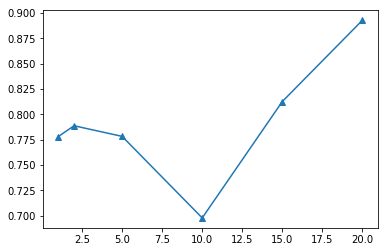

In [17]:
from sklearn.neural_network import MLPClassifier

alphaList=[5,20,30,40]
NN_score=[]
for value in alphaList:  
    NN_model = MLPClassifier(solver='lbfgs',alpha = value)
    NN_model.fit(X_scaled_train,y_train);
    NN_score.append(NN_model.score(X_scaled_test, y_test))
plt.figure()
plt.plot(alphaList, NN_score, marker='^')
plt.xlabel('Regularization Strength (ALPHA)')
plt.ylabel('Neural Network Prediction Accuracy')
plt.show()